In [1]:
# 데이터 분석을 위해 pandas, numpy, 시각화를 위해 matplotlib 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 그래프 스타일 설정
plt.style.use("seaborn")

In [3]:
! pip install PyMySQL

     |████████████████████████████████| 43 kB 1.2 MB/s 


In [4]:
import pymysql.cursors

In [5]:
# 데이터베이스 연결
connection = pymysql.connect(host='13.124.77.49', #EC2 아이피
                             user='USER_SQLSTK',  #데이터베이스 사용자
                             password='1qaz2wsx', #데이터베이스 암호
                             database='DB_SQLSTK', #데이터베이스 이름
                             charset='utf8',       # 언어 설정 
                             cursorclass=pymysql.cursors.DictCursor # 조회결과를 dictionary로 리턴
                             )

In [6]:
connection

In [7]:
cursor = connection.cursor()

In [8]:
cursor

In [9]:
#실행할 SQL
# 2019년 1월 1일 ~ 2020년 12월 31일 카카오의 종가,시가,고가,저가, 거래량조회
sql = """
      SELECT T1.STK_CD,T1.DT, T1.C_PRC, T1.O_PRC, T1.H_PRC, T1.L_PRC, T1.VOL
      FROM  HISTORY_DT T1
      WHERE T1.STK_CD = '035720'
      AND T1.DT >= '2019-01-01'
      AND T1.DT <= '2020-12-31'
"""  

In [10]:
# SQL 쿼리를 실행할 준비를 함
cursor.execute(sql)

494

In [11]:
# SQL 쿼리를 실행하고 결과를 result에 저장
result = cursor.fetchall()

In [12]:
# SQL 쿼리 실행 결과 출력
result

[{'C_PRC': Decimal('102000.000'),
  'DT': datetime.date(2019, 1, 2),
  'H_PRC': Decimal('105000.000'),
  'L_PRC': Decimal('101500.000'),
  'O_PRC': Decimal('103500.000'),
  'STK_CD': '035720',
  'VOL': Decimal('173462.000')},
 {'C_PRC': Decimal('102500.000'),
  'DT': datetime.date(2019, 1, 3),
  'H_PRC': Decimal('105500.000'),
  'L_PRC': Decimal('100500.000'),
  'O_PRC': Decimal('102500.000'),
  'STK_CD': '035720',
  'VOL': Decimal('293989.000')},
 {'C_PRC': Decimal('103500.000'),
  'DT': datetime.date(2019, 1, 4),
  'H_PRC': Decimal('104000.000'),
  'L_PRC': Decimal('101500.000'),
  'O_PRC': Decimal('102000.000'),
  'STK_CD': '035720',
  'VOL': Decimal('251728.000')},
 {'C_PRC': Decimal('103000.000'),
  'DT': datetime.date(2019, 1, 7),
  'H_PRC': Decimal('107000.000'),
  'L_PRC': Decimal('102000.000'),
  'O_PRC': Decimal('105000.000'),
  'STK_CD': '035720',
  'VOL': Decimal('378153.000')},
 {'C_PRC': Decimal('99900.000'),
  'DT': datetime.date(2019, 1, 8),
  'H_PRC': Decimal('103000.0

In [13]:
# result를 DataFrame으로 변환
df = pd.DataFrame(result)

In [14]:
df

,STK_CD,DT,C_PRC,O_PRC,H_PRC,L_PRC,VOL
0,035720,2019-01-02,102000.000,103500.000,105000.000,101500.000,173462.000
1,035720,2019-01-03,102500.000,102500.000,105500.000,100500.000,293989.000
2,035720,2019-01-04,103500.000,102000.000,104000.000,101500.000,251728.000
3,035720,2019-01-07,103000.000,105000.000,107000.000,102000.000,378153.000
4,035720,2019-01-08,99900.000,102500.000,103000.000,99500.000,450462.000
...,...,...,...,...,...,...,...
489,035720,2020-12-23,377500.000,381000.000,385500.000,377000.000,629952.000
490,035720,2020-12-24,374000.000,378500.000,380000.000,372000.000,465132.000
491,035720,2020-12-28,373000.000,374500.000,377000.000,369500.000,646464.000
492,035720,2020-12-29,384500.000,381000.000,385500.000,378000.000,857404.000


In [15]:
# df의 컬럼 타입 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   STK_CD  494 non-null    object
 1   DT      494 non-null    object
 2   C_PRC   494 non-null    object
 3   O_PRC   494 non-null    object
 4   H_PRC   494 non-null    object
 5   L_PRC   494 non-null    object
 6   VOL     494 non-null    object
dtypes: object(7)
memory usage: 27.1+ KB


In [16]:
# DT 컬럼의 타입을 날짜와 시간으로 변환
df["DT"] = pd.to_datetime (df["DT"])

In [17]:
# C_PRC 컬럼부터 마지막 컬럼까지의 타입을 정수로 변환
df.loc[: , "C_PRC" : ] = df.loc[: , "C_PRC" : ].astype(int)

In [18]:
# df의 컬럼 타입 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   STK_CD  494 non-null    object        
 1   DT      494 non-null    datetime64[ns]
 2   C_PRC   494 non-null    int64         
 3   O_PRC   494 non-null    int64         
 4   H_PRC   494 non-null    int64         
 5   L_PRC   494 non-null    int64         
 6   VOL     494 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 27.1+ KB


In [19]:
# diff() : 함수는 윗줄 (하루전) 데이터와 아래줄 데이터(현재)의 차를 계산

df["diff"] = df["C_PRC"].diff()

In [20]:
def UD(diff):
    """
    diff 값을 입력받아 0이면 ups, downs을 0으로 
    0보다 크면 ups 에 diff값을 작으면 downs 에 abs(diff) 값을 반환합니다.
    ups = 전날 주가보다 오늘 주가가 상승할 때의 주가 상승폭(up)
    downs = 전날 주가보다 오늘 주가가 하락할 때의 주가 하락폭(down)
    """
    ups = 0
    downs = 0
    # 전날주가 - 오늘주가가 0 초과
    if diff > 0:
        # 상승치를 ups에 대입
        ups = diff
    elif diff < 0: # 전날주가 - 오늘주가가 0 미만
        # 하락치의 절대값 (abs)를 downs 에 대입
        downs = abs(diff)
    # ups와 downs 를 Series(DataFrame 칸) 으로 만들어서 리턴    
    return pd.Series([ups, downs])

In [21]:
#  df["diff"] 컬럼 데이터에 UD 함수를 실행해서 상승분과 하락분을 계산하고
# 상승분은 U, 하락분은 D 컬럼에 저장
df[["U", "D"]] = df["diff"].apply(UD)

In [22]:
df

,STK_CD,DT,C_PRC,O_PRC,H_PRC,L_PRC,VOL,diff,U,D
0,035720,2019-01-02,102000,103500,105000,101500,173462,NaN,0.0,0.0
1,035720,2019-01-03,102500,102500,105500,100500,293989,500.0,500.0,0.0
2,035720,2019-01-04,103500,102000,104000,101500,251728,1000.0,1000.0,0.0
3,035720,2019-01-07,103000,105000,107000,102000,378153,-500.0,0.0,500.0
4,035720,2019-01-08,99900,102500,103000,99500,450462,-3100.0,0.0,3100.0
...,...,...,...,...,...,...,...,...,...,...
489,035720,2020-12-23,377500,381000,385500,377000,629952,1500.0,1500.0,0.0
490,035720,2020-12-24,374000,378500,380000,372000,465132,-3500.0,0.0,3500.0
491,035720,2020-12-28,373000,374500,377000,369500,646464,-1000.0,0.0,1000.0
492,035720,2020-12-29,384500,381000,385500,378000,857404,11500.0,11500.0,0.0


In [23]:
# AU = 일정기간(N일,보통14일) 동안의 U의 평균값(average ups)
df["AU"] = df["U"].rolling(14).mean()

In [24]:
# AD = 일정기간(N일,보통14일) 동안의 D의 평균값(average downs)
df["AD"] = df["D"].rolling(14).mean()

In [25]:
df.tail()

,STK_CD,DT,C_PRC,O_PRC,H_PRC,L_PRC,VOL,diff,U,D,AU,AD
489,035720,2020-12-23,377500,381000,385500,377000,629952,1500.0,1500.0,0.0,2500.000000,2250.0
490,035720,2020-12-24,374000,378500,380000,372000,465132,-3500.0,0.0,3500.0,1392.857143,2500.0
491,035720,2020-12-28,373000,374500,377000,369500,646464,-1000.0,0.0,1000.0,1392.857143,2250.0
492,035720,2020-12-29,384500,381000,385500,378000,857404,11500.0,11500.0,0.0,2214.285714,1500.0
493,035720,2020-12-30,389500,384500,394000,383500,813142,5000.0,5000.0,0.0,2535.714286,1500.0


In [26]:
# RS = AU / AD
# RSI = AU / (AU+AD) = RS / (1+RS)
# RS = AU(일정기간(N일,보통14일) 동안의 U의 평균값(average ups) ) / AD (일정기간(N일,보통14일) 동안의 D의 평균값(average downs))
# 
df["RS"] = df["AU"] / df["AD"]

In [27]:
#AU / (AU+AD) = RS / (1+RS)
df["RSI"] = df["RS"] / (1 + df["RS"])

In [28]:
df.tail()

,STK_CD,DT,C_PRC,O_PRC,H_PRC,L_PRC,VOL,diff,U,D,AU,AD,RS,RSI
489,035720,2020-12-23,377500,381000,385500,377000,629952,1500.0,1500.0,0.0,2500.000000,2250.0,1.111111,0.526316
490,035720,2020-12-24,374000,378500,380000,372000,465132,-3500.0,0.0,3500.0,1392.857143,2500.0,0.557143,0.357798
491,035720,2020-12-28,373000,374500,377000,369500,646464,-1000.0,0.0,1000.0,1392.857143,2250.0,0.619048,0.382353
492,035720,2020-12-29,384500,381000,385500,378000,857404,11500.0,11500.0,0.0,2214.285714,1500.0,1.476190,0.596154
493,035720,2020-12-30,389500,384500,394000,383500,813142,5000.0,5000.0,0.0,2535.714286,1500.0,1.690476,0.628319


In [29]:
# RSI_signal 변수를 생성합니다.
df['RSI_signal'] = df["RSI"].rolling(6).mean()

In [30]:
df.tail()

,STK_CD,DT,C_PRC,O_PRC,H_PRC,L_PRC,VOL,diff,U,D,AU,AD,RS,RSI,RSI_signal
489,035720,2020-12-23,377500,381000,385500,377000,629952,1500.0,1500.0,0.0,2500.000000,2250.0,1.111111,0.526316,0.504958
490,035720,2020-12-24,374000,378500,380000,372000,465132,-3500.0,0.0,3500.0,1392.857143,2500.0,0.557143,0.357798,0.484083
491,035720,2020-12-28,373000,374500,377000,369500,646464,-1000.0,0.0,1000.0,1392.857143,2250.0,0.619048,0.382353,0.469939
492,035720,2020-12-29,384500,381000,385500,378000,857404,11500.0,11500.0,0.0,2214.285714,1500.0,1.476190,0.596154,0.487402
493,035720,2020-12-30,389500,384500,394000,383500,813142,5000.0,5000.0,0.0,2535.714286,1500.0,1.690476,0.628319,0.502278


In [31]:
# DT 컬럼 (날짜) 를 인덱스로 설정
df = df.set_index("DT")

In [32]:
df.tail()

,STK_CD,C_PRC,O_PRC,H_PRC,L_PRC,VOL,diff,U,D,AU,AD,RS,RSI,RSI_signal
DT,,,,,,,,,,,,,,
2020-12-23,035720,377500,381000,385500,377000,629952,1500.0,1500.0,0.0,2500.000000,2250.0,1.111111,0.526316,0.504958
2020-12-24,035720,374000,378500,380000,372000,465132,-3500.0,0.0,3500.0,1392.857143,2500.0,0.557143,0.357798,0.484083
2020-12-28,035720,373000,374500,377000,369500,646464,-1000.0,0.0,1000.0,1392.857143,2250.0,0.619048,0.382353,0.469939
2020-12-29,035720,384500,381000,385500,378000,857404,11500.0,11500.0,0.0,2214.285714,1500.0,1.476190,0.596154,0.487402
2020-12-30,035720,389500,384500,394000,383500,813142,5000.0,5000.0,0.0,2535.714286,1500.0,1.690476,0.628319,0.502278


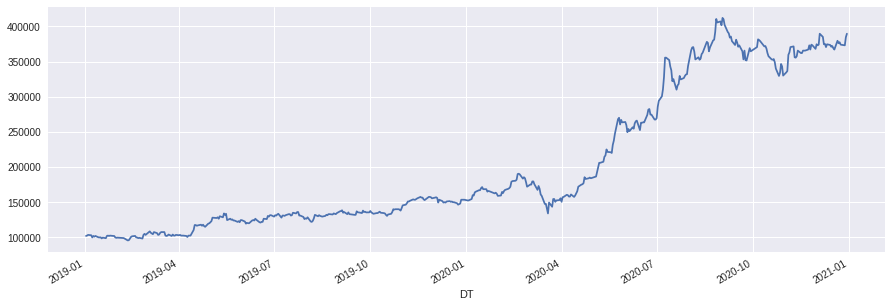

In [33]:
# RSI와 비교해 보기 위해 종가를 시각화 합니다.
df["C_PRC"].plot(figsize=(15, 5))

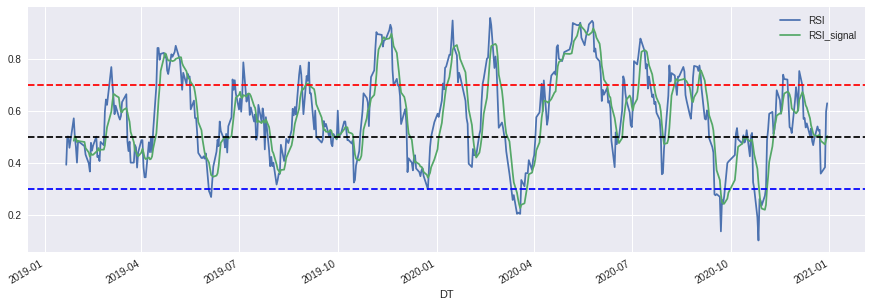

In [34]:
# 'RSI','RSI_signal' 을 시각화 합니다.
df[["RSI", "RSI_signal"]].plot(figsize=(15, 5))
# RSI 가 70퍼센트 지점에 빨강색 선 ->  RSI가 70% 이상이면 매수세가 상당히 커서 초과매수 국면에 돌입했다고 판단합니다.
plt.axhline(0.7, c="r", ls="--")
# RSI 가 50 퍼센트 지점에 검정색 선 -> RSI는 50%를 기준으로, 50% 이상은 매수세 우세, 50% 이하는 매도세 우세를 나타냅니다.
plt.axhline(0.5, c="k", ls="--")
# RSI 가 30 퍼센트 지점에 파랑색 선 ->  RSI가 30% 이하이면 매도세가 상당히 커서 초과매도 국면에 돌입했다고 판단합니다.
plt.axhline(0.3, c="b", ls="--")

In [35]:
# plotly 최신버전을 사용해 주세요. 최신버전이 아닐 때 동작하지 않을 수 있습니다.
!pip install plotly --upgrade

     |████████████████████████████████| 21.8 MB 1.3 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [36]:
# plotly.express 로드하기
import plotly.express as px

In [37]:
# 0.3, 0.7 값을 컬럼으로 만들어 줍니다.
df["s3"] = 0.3
df["s7"] = 0.7

In [38]:
df.tail()

,STK_CD,C_PRC,O_PRC,H_PRC,L_PRC,VOL,diff,U,D,AU,AD,RS,RSI,RSI_signal,s3,s7
DT,,,,,,,,,,,,,,,,
2020-12-23,035720,377500,381000,385500,377000,629952,1500.0,1500.0,0.0,2500.000000,2250.0,1.111111,0.526316,0.504958,0.3,0.7
2020-12-24,035720,374000,378500,380000,372000,465132,-3500.0,0.0,3500.0,1392.857143,2500.0,0.557143,0.357798,0.484083,0.3,0.7
2020-12-28,035720,373000,374500,377000,369500,646464,-1000.0,0.0,1000.0,1392.857143,2250.0,0.619048,0.382353,0.469939,0.3,0.7
2020-12-29,035720,384500,381000,385500,378000,857404,11500.0,11500.0,0.0,2214.285714,1500.0,1.476190,0.596154,0.487402,0.3,0.7
2020-12-30,035720,389500,384500,394000,383500,813142,5000.0,5000.0,0.0,2535.714286,1500.0,1.690476,0.628319,0.502278,0.3,0.7


In [39]:
# RSI, RSI_signal, s3, s7 을 선그래프로 그림
px.line(df[["RSI", "RSI_signal", "s3", "s7"]])

In [40]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 3 줄 1칸짜리 그래프 생성 
fig = make_subplots(rows=3, 
                    cols=1,
                    vertical_spacing=0.01,
                    shared_xaxes=True,
                    # 각 줄의 제목
                    subplot_titles=('<b>카카오</b>',
                                    '<b>Select Date Range!</b>',
                                    '<b>RSI & RSI signal</b>'))

fig.add_trace(    # 봉차트 추가
                   go.Candlestick(
                        x=df.index,              #날짜
                        open=df['O_PRC'],      # 시가
                        high=df['H_PRC'],     #고가
                        low=df['L_PRC'],       #저가
                        close=df['C_PRC'],   # 종가
                        increasing_line_color='red', # 상승봉의 색 설정
                        decreasing_line_color='blue' # 하락봉의 색 설정
                  ), 
                  row=1, col=1) # 1번째줄 1번째 칸에 추가

fig.add_trace(
                    # 선그래프 추가
                     go.Scatter(
                         x=df.index, #날짜
                         y=df['RSI'], # RSI
                         line=dict(color='blue'), #파란색
                         name='RSI'), # 범례
                row=3, col=1) # 3번째줄 1번째 칸에 추가

fig.add_trace(go.Scatter(x=df.index, 
                         y=df['RSI_signal'],
                         line=dict(color='red'),
                         name='RSI_signal'), row=3, col=1)
#선그래프 추가
fig.add_trace(go.Scatter(x=df.index, #날짜
                         y=df["s3"],#s3 
                         line=dict(color='red',dash='dash'), #빨강색
                         name='Low bound'),#범례
              row=3,col=1) #3번째줄 1번째 칸에 추가

# 선그래프 추가
fig.add_trace(go.Scatter(x=df.index, #날짜
                         y=df["s7"],#s3
                         line=dict(color='blue',dash='dash'),#파랑색
                         name='High bound'), #범례
              row=3,col=1) #3번째줄 1번째 칸에 추가

# 그래프 가로 1200 세로 800 기간 슬라이더 추가
fig.update_layout(width=1200, height=800, xaxis_rangeslider_visible=True)

fig.show()